# Facial Recognition Classification

In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import os
import shutil


In [3]:
# data for Hugh Jackman
#query = 'Hugh Jackman'
#downloader.download(query, limit=200,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
#dataset_split(query, 150)

In [4]:
# data for Ryan Reynolds
#query = 'Ryan Reynolds'
#downloader.download(query, limit=200,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
#dataset_split(query, 150)

In [5]:
# data for Jake Gyllenhaal
#query = 'Jake Gyllenhaal'
#downloader.download(query, limit=200,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
#dataset_split(query, 150)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device

In [7]:
# define transforms_train dataset
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalization
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './web_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('size of training dataset:', len(train_datasets))
print('size of testing dataset:', len(test_datasets))

class_names = train_datasets.classes
print('class:', class_names)

size of training dataset: 370
size of testing dataset: 123
class: ['Hugh Jackman', 'Jake Gyllenhaal', 'Ryan Reynolds']


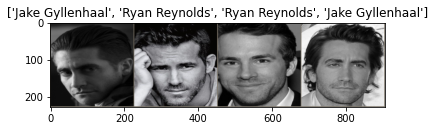

In [8]:
def imshow(input, title):
    # convert torch.Tensor to numpy
    input = input.numpy().transpose((1, 2, 0))
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # print image
    plt.imshow(input)
    plt.title(title)
    plt.show()


# call training data in batches
iterator = iter(train_dataloader)

# visualize the batches
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [9]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# transfer learning
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
num_epochs = 15
model.train()
start_time = time.time()

# iterates
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # call training data in batches
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # print the result while training
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 0.6723 Acc: 71.0811% Time: 77.0220s
#1 Loss: 0.7208 Acc: 77.0270% Time: 159.6381s
#2 Loss: 0.3313 Acc: 86.7568% Time: 239.7553s
#3 Loss: 0.3009 Acc: 89.7297% Time: 316.6547s
#4 Loss: 0.3345 Acc: 88.9189% Time: 394.2813s
#5 Loss: 0.2050 Acc: 92.1622% Time: 470.2796s
#6 Loss: 0.1986 Acc: 94.0541% Time: 550.6662s
#7 Loss: 0.1319 Acc: 95.4054% Time: 628.6896s
#8 Loss: 0.1231 Acc: 96.7568% Time: 709.8498s
#9 Loss: 0.1547 Acc: 94.5946% Time: 790.0123s
#10 Loss: 0.0623 Acc: 97.5676% Time: 866.9106s
#11 Loss: 0.1423 Acc: 96.7568% Time: 940.8391s
#12 Loss: 0.0965 Acc: 98.3784% Time: 1012.9770s
#13 Loss: 0.0850 Acc: 97.2973% Time: 1086.3538s
#14 Loss: 0.1392 Acc: 95.6757% Time: 1161.4824s


[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


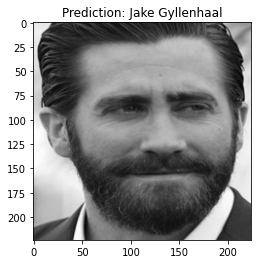

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


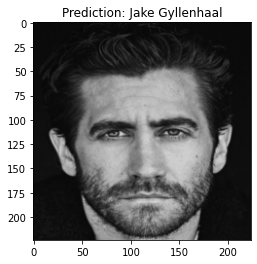

[Prediction: Ryan Reynolds] (Actual subject: Ryan Reynolds)


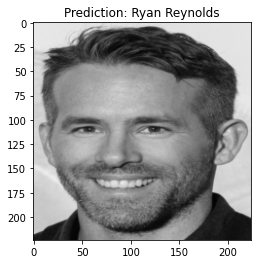

[Prediction: Ryan Reynolds] (Actual subject: Ryan Reynolds)


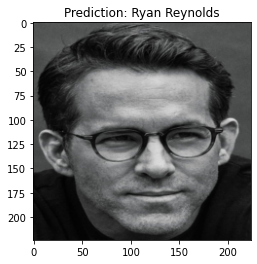

[Prediction: Ryan Reynolds] (Actual subject: Ryan Reynolds)


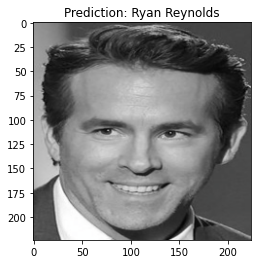

[Prediction: Hugh Jackman] (Actual subject: Hugh Jackman)


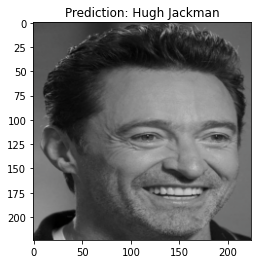

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


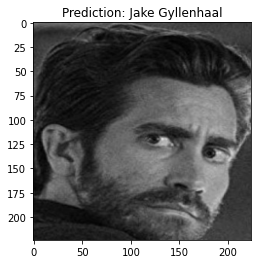

[Prediction: Ryan Reynolds] (Actual subject: Ryan Reynolds)


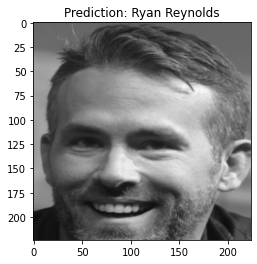

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


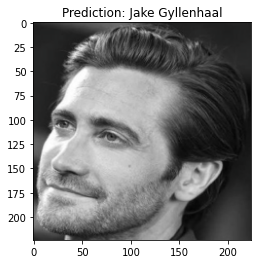

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


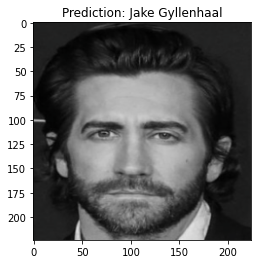

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


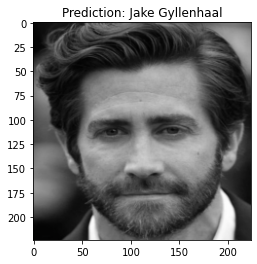

[Prediction: Ryan Reynolds] (Actual subject: Ryan Reynolds)


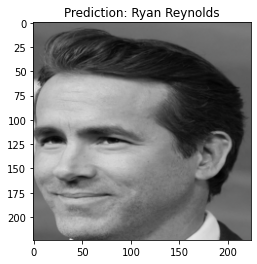

[Prediction: Hugh Jackman] (Actual subject: Hugh Jackman)


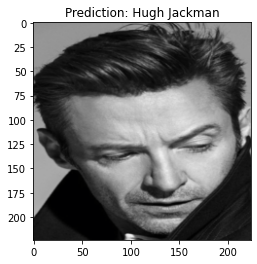

[Prediction: Hugh Jackman] (Actual subject: Hugh Jackman)


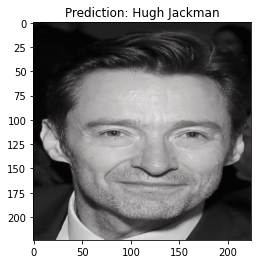

[Prediction: Ryan Reynolds] (Actual subject: Ryan Reynolds)


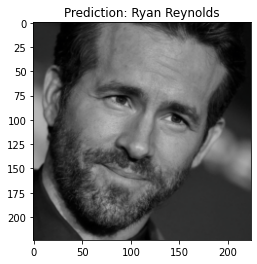

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


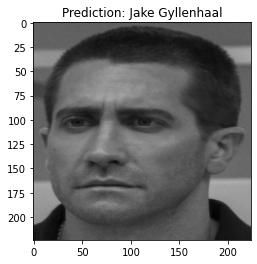

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


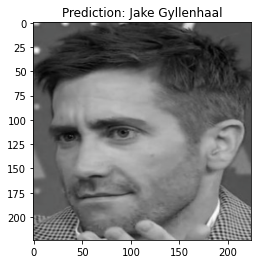

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


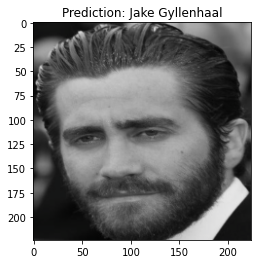

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


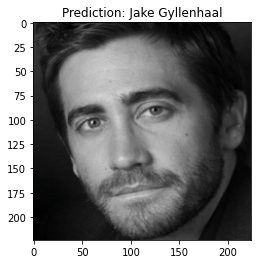

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


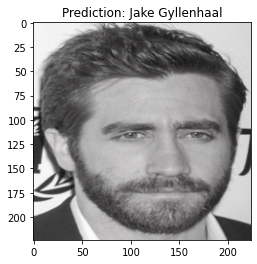

[Prediction: Hugh Jackman] (Actual subject: Hugh Jackman)


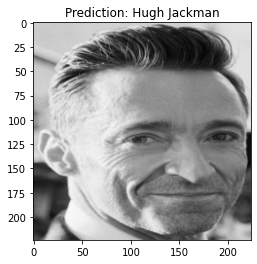

[Prediction: Ryan Reynolds] (Actual subject: Ryan Reynolds)


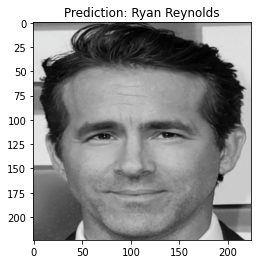

[Prediction: Hugh Jackman] (Actual subject: Hugh Jackman)


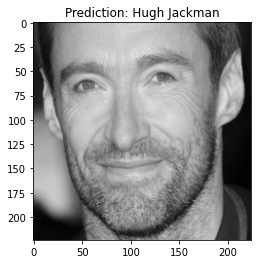

[Prediction: Ryan Reynolds] (Actual subject: Ryan Reynolds)


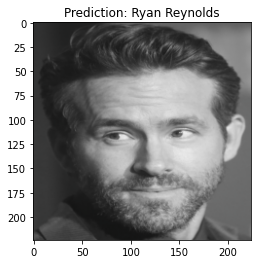

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


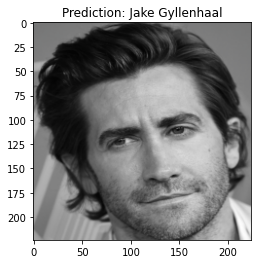

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


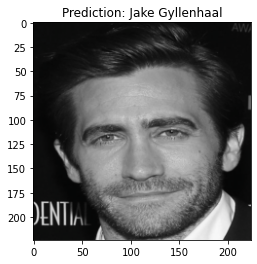

[Prediction: Hugh Jackman] (Actual subject: Hugh Jackman)


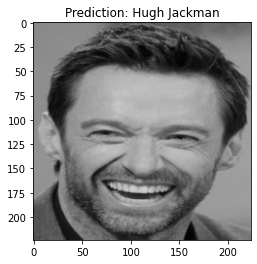

[Prediction: Ryan Reynolds] (Actual subject: Ryan Reynolds)


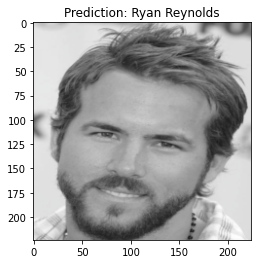

[Prediction: Hugh Jackman] (Actual subject: Hugh Jackman)


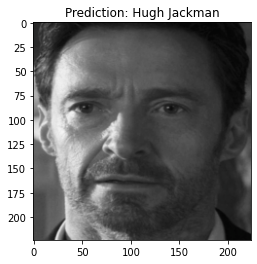

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


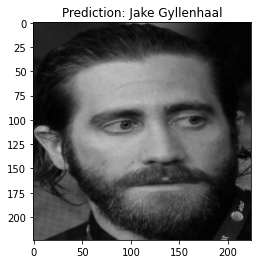

[Prediction: Jake Gyllenhaal] (Actual subject: Jake Gyllenhaal)


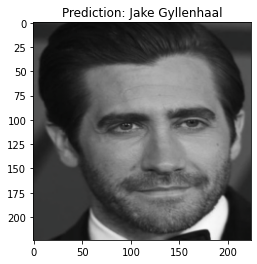

[Test Phase] Loss: 0.1714 Acc: 95.1219% Time: 32.1361s


In [11]:
# evaluate the model
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # visualize
        print(f'[Prediction: {class_names[preds[0]]}] (Actual subject: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='Prediction: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))